Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Response_named = 
[['capital' '7.45851669128247' '7.052882254092272' ...
  '4.474696088659586' '4.706255416660143' '4.881002527405187']
 ['consumption' '4.127799344110414' '4.053098040295125' ...
  '3.8818032506313718' '3.9110514828438863' '3.899139079670088']
 ['output' '0.03290907841530438' '0.7660237026177337' ...
  '6.914695759300151' '6.4304707040587505' '5.89831251368779']
 ...
 ['interest' '-0.27523777228057317' '-0.23256413135609838' ...
  '0.09480131059929944' '0.06796316788512155' '0.04142398412171136']
 ['investment' '-11.842732275744249' '-8.766860796325451' ...
  '15.710424426415877' '13.737069208681863' '11.696139846461897']
 ['technology' '-0

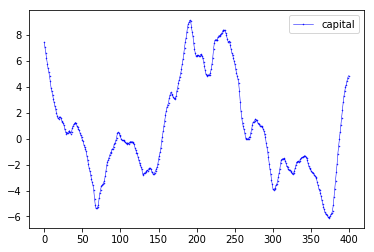

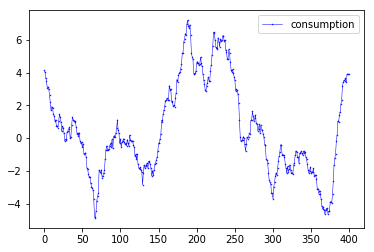

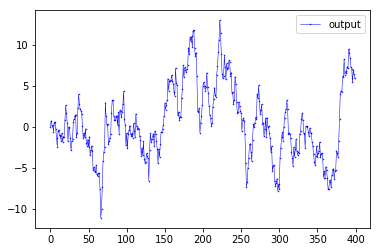

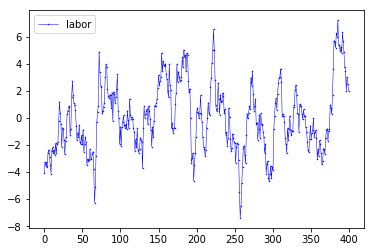

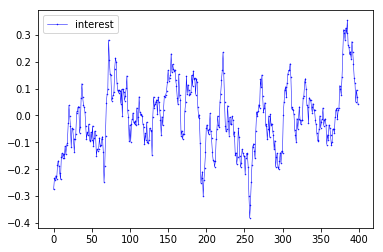

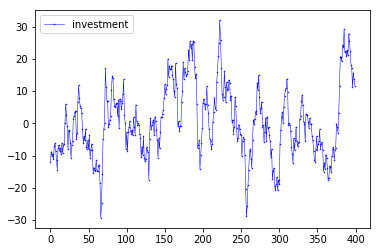

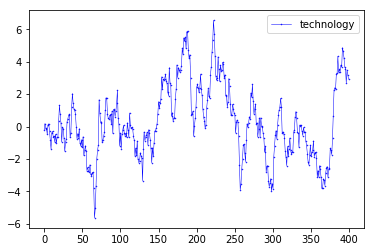

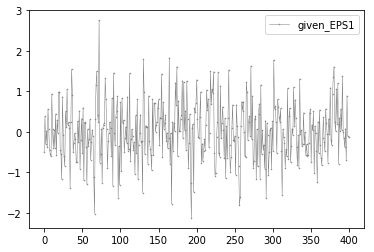

In [4]:
#   Uhlig's Exampl05.m  Model 1
#   This is  "Economy 3" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable  c(t)

###  NOTE NOTE
### Py and MAT results match for Model 1,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 1  

lamb = 1
b = 0.64
a = 0.36                
psi =1.0/1.05 
sigma_sigma = 0.70

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']



AA = np.vstack(([0, -C_bar],
                          [- K_bar, 0],
                          [0, 0],
                          [0, -eta],
                          [0, 0]))

BB = np.vstack(([0, 0],
                          [(1-delta)*K_bar, 0],
                          [alpha, 0],
                          [0, 0],
                          [-a*YK_bar, 0]))

CC = np.vstack(([Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, I_bar],
                           [-1, betta, 0, 0],
                           [1, -1, 0, 0],
                           [a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0, -eta]

GG = [0, eta]

HH = [0, 0]

JJ = [0, 0, 1, 0]

KK = [0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Uhlig_plot_simul_all.ipynb




